In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import pandas as pd

Import the table obtained in the access phase

In [6]:
krannet_df = pd.read_json('../cache/network_analysis_data.json')
krannet_df.sort_values(by=['meeting_id'], inplace=True)

# remove some people
krannet_df = krannet_df[krannet_df.interventions > 1]

display(krannet_df.tail(), len(krannet_df))


,year,speaker_id,meeting_id,speaker_name,interventions
155,1861,178,9,Abg. Guttman,1
35,1861,186,9,Abg. Dr. v. Wurzbach,2
55,1861,181,9,Abg. v. Langer,1
97,1861,175,9,Präsident,6
94,1861,174,9,Dräsidcnl,1


186

Plot social network of people giving a pitch in the same meeting

In [7]:
def add_edges_for_meeting(meeting_id, graph, dataframe):

    # Generate all possible combinations of pairs within a list
    combinations_list = list(combinations(dataframe[dataframe.meeting_id == meeting_id].speaker_name, 2))
    
    # Add Edges
    for s1, s2 in combinations_list:
        graph.add_edge(s1, s2)


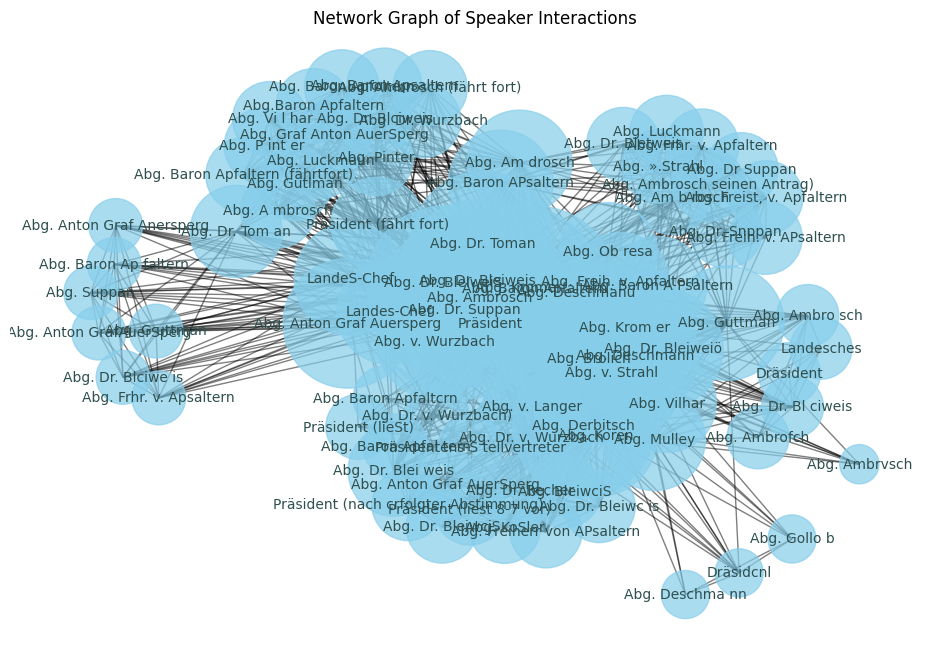

In [8]:
G = nx.Graph()

# Create counters for nodes and edges
node_counter = Counter()
edge_counter = Counter()

for m in set(krannet_df.meeting_id):
    combinations_list = list(combinations(krannet_df[krannet_df.meeting_id == m].speaker_name, 2))
    #print(combinations_list[:5])
    
    # Add Edges
    for s1, s2 in combinations_list:
        G.add_edge(s1, s2)
        node_counter[s1] += 1
        node_counter[s2] += 1
        edge_counter[(s1, s2)] += 1


# Normalize node sizes for better visualization
node_sizes = [node_counter[node] * 100 for node in G.nodes()]  # Adjust scaling factor as needed

# Normalize edge widths for better visualization
edge_widths = [edge_counter[edge] for edge in G.edges()]

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Use a layout for the graph
pos = nx.spring_layout(G, seed=42)  # spring layout with a fixed seed for reproducibility

# Draw nodes and edges with attributes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='darkslategray')

# Title and display options
plt.title('Network Graph of Speaker Interactions')
plt.axis('off')  # Hide the axes
plt.show();

In [5]:
# calculate degree centrality and betweenness for nx
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# define the node labels
nodes = list(set(krannet_df.speaker_name))
print(nodes)

# retrieve degree centrality for each node
dc_calculations = []
bc_calculations = []

for node in nodes:
    dc_calculations += [degree_centrality[node]]
    bc_calculations += [betweenness_centrality[node]]

# create a centrality data df to store values
centrality_data = pd.DataFrame()

# populate the df with the nodes and their centrality values
centrality_data["Node"] = nodes
centrality_data["Degree-Centrality"] = dc_calculations
centrality_data["Betweenness-Centrality"] = bc_calculations

print(centrality_data)

['Landes-Chef', 'Präsident', 'Abg. Dr. Bleiweiö', 'Abg. Dr. BleiweiS', 'Abg. v. Strahl', 'Abg. Koren', 'Abg. Dr. Toman', 'Abg. Mulley', 'Abg. Dr. Suppan', 'Abg. Krom er', 'Abg. Brolich', 'Abg. Kromer', 'Abg. Baron Apfaltern', 'Abg. Guttman', 'Abg. Dr. Bleiweis', 'Abg. Vilhar', 'Abg. Dr. v. Wurzbach', 'Abg. Ambrosch', 'Abg. Derbitsch', 'Abg. Anton Graf Auersperg']
                         Node  Degree-Centrality  Betweenness-Centrality
0                 Landes-Chef           0.263158                0.000000
1                   Präsident           1.000000                0.218421
2           Abg. Dr. Bleiweiö           0.315789                0.000000
3           Abg. Dr. BleiweiS           0.473684                0.000000
4              Abg. v. Strahl           0.684211                0.028850
5                  Abg. Koren           0.315789                0.000000
6              Abg. Dr. Toman           0.736842                0.045322
7                 Abg. Mulley           0.315789  

_____
TEST

**Social Network Analysis**

Dummy examples: we start with symmetric relationships between President and two other speakers. 

In [ ]:


# create a new graph
G_symmetric = nx.Graph()

# add nodes and edges
G_symmetric.add_edge('President','Albert')
G_symmetric.add_edge('President','Franziska')
G_symmetric.add_edge('President','Kerstin')

# draw the graph
fig = plt.figure(figsize=(12, 8))
nx.draw_networkx(G_symmetric, font_size=10)
plt.show();

**Calculate Centrality**

calculate the degree centrality and betweenness centrality of nodes in the network.

In [ ]:
# calculate degree centrality and betweenness for nx
degree_centrality = nx.degree_centrality(G_symmetric)
betweenness_centrality = nx.betweenness_centrality(G_symmetric)

# define the node labels
nodes  = ["President", "Albert", "Franziska", "Kerstin"]

# retrieve degree centrality for each node
dc_calculations = []
bc_calculations = []

for node in nodes:
    dc_calculations += [degree_centrality[node]]
    bc_calculations += [betweenness_centrality[node]]

# create a centrality data df to store values
centrality_data = pd.DataFrame()

# populate the df with the nodes and their centrality values
centrality_data["Node"] = nodes
centrality_data["Degree-Centrality"] = dc_calculations
centrality_data["Betweenness-Centrality"] = bc_calculations

print(centrality_data)

**Social Networks for multiple meetings**

Represent the relationships between Billy Corgan and each of these band members. 
In graph theory, this kind of relation is known as symmetric. If President is in a meeting with Albert, Albert is also in a meeting with President.

Create a function that will ingest each list of meeting speakers and return all the possible combinations of the pairs.

In [ ]:
# speaker_table per meeting
speaker_table_meeting_one = ['President',
                            'Albert', 
                            'Franziska',
                            'Kerstin',
                            'Darcy Wretzky', 
                            'Melissa Auf der Maur', 
                            'Ginger Pooley', 
                            'Mike Byrne',
                            'Nicole Fiorentino']

speaker_table_meeting_two = ['President', 
                            'Jimmy Chamberlin', 
                            'Paz Lenchantin', 
                            'David Pajo', 
                            'Matt Sweeney']

In [ ]:
from itertools import combinations

def get_combinations(input_list):

    """
    Generate all possible combinations of pairs within a list.
    Args:
        input_list (list): The input list.
    Returns:
        list: A list of tuples representing all possible combinations of pairs.
    """

    combinations_list = list(combinations(input_list, 2))
    
    return combinations_list


# combinations_list = [('President', 'Albert'),
#                      ('President', 'Franziska'),
#                      ('President', 'Kesrtin')]

print(get_combinations(speaker_table_meeting_one))

from this output, we make a network:

In [ ]:
G_symmetric = nx.Graph()
for pair in speaker_table_meeting_one:
    G_symmetric.add_edge(pair[0], pair[1])
    
fig = plt.figure(figsize=(8, 6))
nx.draw_networkx(G_symmetric)
plt.show()

Degree Centrality and Betweenness Centrality with NetworkX

In [ ]:
# 1. Use methods in NetworkX to extract centrality measures
betweenness_centrality = nx.betweenness_centrality(G_symmetric)
degree_centrality = nx.degree_centrality(G_symmetric)

# 2. Calculate betweenness, and store values in a dataframe
bc_data = pd.DataFrame.from_dict(betweenness_centrality, 
                                 columns=["BetweennessCentrality"], 
                                 orient="index")

# 3. Calculate betweenness, and store values in a dataframe
dc_data = pd.DataFrame.from_dict(degree_centrality, 
                                 columns=["DegreeCentrality"], 
                                 orient="index")

# 4. Calculate betweenness, and store values in a dataframe
centrality_data = pd.concat([bc_data, dc_data], axis=1)

print(centrality_data)